# Tutorial
This assumes you have run the relevant .ctl files in the Examples directory.
Author: Nishan Singh Mann

@Matthew-Mcnish: You need to figure out how to open this file in your web browser. Start by typing `ipython3 notebook` in your terminal.

In [2]:
from MPBParser import MPBBandStructure, readfield, getscale
from misc_plotting_utilities import fourier_transform
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from plotsmpb import plotbands, plotfields, plotvg
from math import sqrt
import sys

In [3]:
%matplotlib inline

# 1D PCs

### GaAs Bulk
Find in Examples/1D/GaAs_Bulk/
We impose an artificial periodicity. Use this example to understand the concept of zone folding.

In [30]:
# Initialize an instance of class MPBBandStructure
mpb = MPBBandStructure('Examples/1D/GaAs_Bulk/run.out', '')

In [31]:
# Parse the output data into csv files
mpb.csvparser()
# At this point, you can use the .csv files to plot them in a program of your liking.

Creating Examples/1D/GaAs_Bulk/freqs.csv
Creating Examples/1D/GaAs_Bulk/velocities.csv


In [32]:
# Read the bandstructure data from the two .csv files
mpb.readbanddata()

Opening Examples/1D/GaAs_Bulk/freqs.csv
Opening Examples/1D/GaAs_Bulk/velocities.csv
No velocity data in velocities csv file. Velocity attributes NOT created.
Parsing of csv files complete. New data attributes created!


In [33]:
# At this point, you should use the TAB autocompletion feature of IPython to examine the new data attributes.
# For example, let's look at the number of k-points
mpb.numK

22

In [34]:
# The frequencies are stored as a tuple (k index, band index)
np.shape(mpb.freqs)

(22, 4)

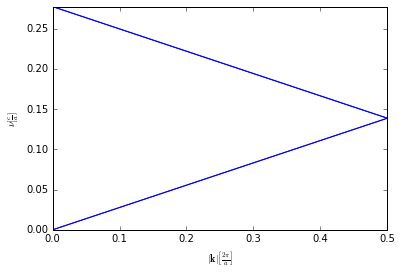

In [35]:
# Let us look at the bandstructure. At this point, take a pause and understand zone folding
plotbands(mpb)

In [29]:
# In this case, there are 4 bands but for now, plotbands plots all bands using the same colour (blue)
mpb.numBands

4